# Project: TMDB Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project I will be analyzing dataset that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. There are 21 columns and 10866 entries. The columns are Movie id, imdb id, popularity, budget, revenue, original title, cast, homepage and the director of the movie.  These info help to uniquely identify the movie.

There are also columns on Tagline, keywords, overview, runtime and the genres of the movie. This info help prospective viewers to choose which movie they prefer. Also, information on the movie's production companies, release date, vote count, vote average, and release year are provided.

The budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time were given in the last two columns: budget adj and revenue adj.

### Questions for Analysis
1. Research Question 1: Which year have the highest revenue generated, the top 5?
2. Which genres are most popular from year to year?
3. What is the most popular genre?
4. What kinds of properties are associated with movies that have high revenues?
5. 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

Here I load the dataset and check the quality, structure and cleanliness

In [78]:
df = pd.read_csv('tmdb-movies.csv')

Some columns like 'Id', 'imdb' are unnecessary for my analysis so I have to remove them

In [79]:
dropped_columns = ['id', 'imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime']
for columns in dropped_columns:
    if columns in df.columns:
        df.drop(columns, axis = 1, inplace = True)

In [80]:
df.head()

,popularity,budget,revenue,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The genre columns contains more than one movie genre

In [81]:
df.shape

(10866, 11)

In [82]:
df.corr()

,popularity,budget,revenue,vote_count,vote_average,release_year,budget_adj,revenue_adj
popularity,1.000000,0.545472,0.663358,0.800828,0.209511,0.089801,0.513550,0.609083
budget,0.545472,1.000000,0.734901,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,0.663358,0.734901,1.000000,0.791175,0.172564,0.057048,0.706427,0.919110
vote_count,0.800828,0.632702,0.791175,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,0.209511,0.081014,0.172564,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.089801,0.115931,0.057048,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,0.513550,0.968963,0.706427,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,0.609083,0.622505,0.919110,0.707942,0.193085,-0.066256,0.646607,1.000000


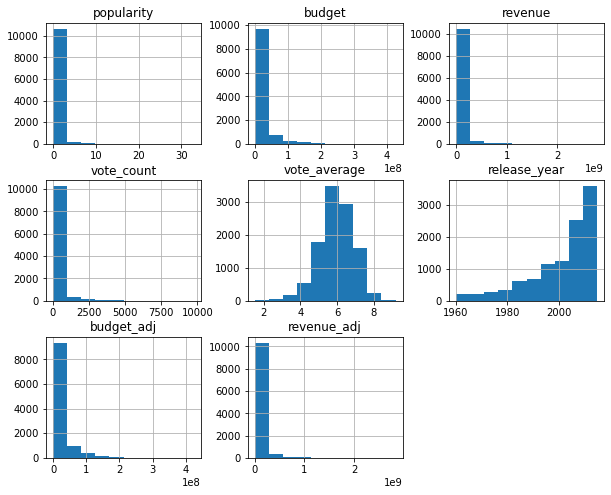

In [83]:
df.hist(figsize=(10,8));

## Explorative data Analysis

### Research Question 1: Which year have the highest revenue generated, the top 5?

###  Univarate Analysis (1D Visualization)

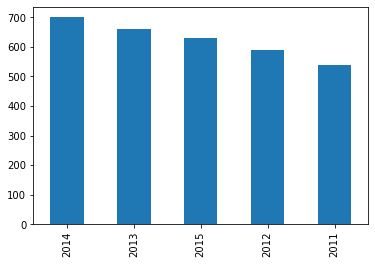

In [92]:
df["release_year"].value_counts().sort_values(ascending=False)[:5].plot(kind = "bar");# Top No of movies release  Per year

In [94]:
df.head()

,popularity,budget,revenue,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### More movies have revenue generated of $1 billion

<AxesSubplot:>

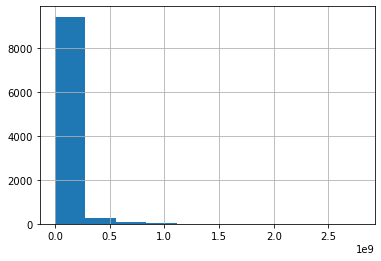

In [99]:
df["revenue"].hist()

#### The average revenue generated is about 44 million dollars

In [100]:
df["revenue"].mean()

43984874.28676096

#### The genre column contains multiple genres, So I removed that column so that we have just a genre per row

In [101]:
df.dropna(inplace = True)

In [102]:
def split_fun(x):
    return x.split("|")[0]

In [104]:
df["genres"] = df["genres"].apply(split_fun)

In [105]:
df["genres"]

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10861    Documentary
10862         Action
10863        Mystery
10864         Action
10865         Horror
Name: genres, Length: 9827, dtype: object

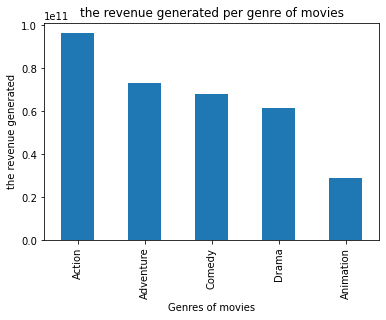

In [106]:
df.groupby("genres")["revenue"].sum().sort_values(ascending = False)[:5].plot(kind= "bar")
plt.title("the revenue generated per genre of movies")
plt.xlabel("Genres of movies")
plt.ylabel("the revenue generated");

### The highest genre based on revenue generated  is Action movies

#### To avoid repeating codes, I defined a function to plot this chart

In [107]:
def func_plpot():
    df.groupby("genres")["revenue"].sum().sort_values(ascending = False)[:5].plot(kind= "bar")
    plt.title("the revenue generated per genre of movies")
    plt.xlabel("Genres of movies")
    plt.ylabel("the revenue generated");
    

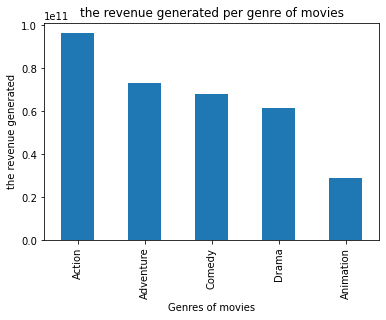

In [108]:
func_plpot()

In [109]:
df.columns

Index(['popularity', 'budget', 'revenue', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')

<AxesSubplot:xlabel='release_date'>

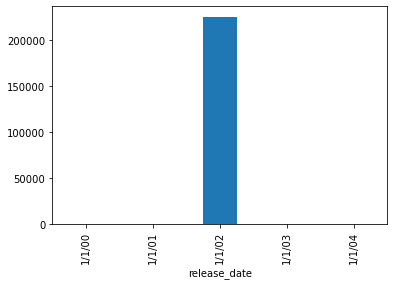

In [110]:
df.groupby("release_date")["revenue"].mean()[:5].plot(kind = "bar")# you can also convert this date to a timestamp object

### The year with highest revenue generrated is 2002

### Research Question 2: Does the popularity of a movie have any effect on the revenue generated ?

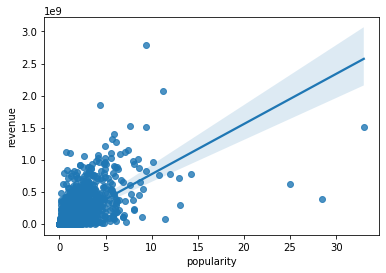

In [111]:
sb.regplot(data = df , x = "popularity", y = "revenue");

### Research Question 3: Does the budget of a movie increases with revenue generated?

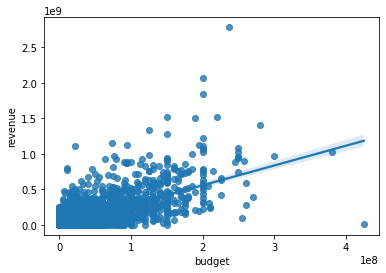

In [112]:
sb.regplot(data = df , x = "budget", y = "revenue");

In [113]:
def relat_func(var1, var2):
    """To define  a function that will help us eleminate repetitive codes"""
    sb.regplot(data = df , x = var1, y = var2);
    

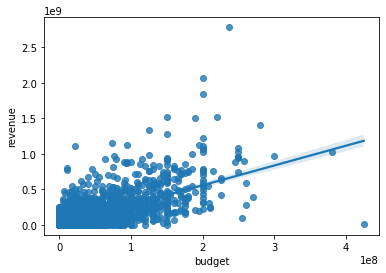

In [114]:
relat_func("budget", "revenue");

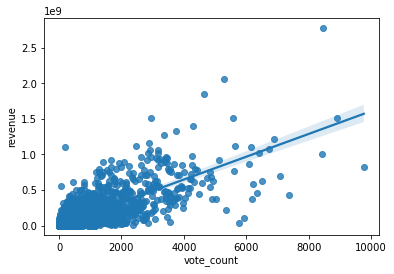

In [115]:
relat_func("vote_count", "revenue");

### Research Question 4: Which genres are most popular from year to year?

In [84]:
#collate a list of all movie release year from the datatable.
year_list = list(sorted(df['release_year'].unique()))
print(year_list)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [95]:
#change datatypes
#column_name = df.columns
#column_data_type = []
#for column in df.columns:
    #column_data_type.append(df[column].dtype)
#matched = zip(column_name, column_data_type)
#list(matched)
df['release_year'] = df['release_year'].astype('string')

In [96]:
#drop null values
df.dropna(inplace=True)

In [97]:
movie_release_year = sorted(df['release_year'].unique())
answer = {}
for year in movie_release_year:
    year_in_question = df.release_year == year 
    max_rating = df['popularity'][year_in_question].max()
    highest_rating = df.popularity == max_rating
    most_popular = df['genres'][highest_rating]
    answer[year] = most_popular.values
    print("the most popular genre for the year " + year + " is " + most_popular.values)

['the most popular genre for the year 1960 is Drama|Horror|Thriller']
['the most popular genre for the year 1961 is Adventure|Animation|Comedy|Family']
['the most popular genre for the year 1962 is Adventure|Action|Thriller']
['the most popular genre for the year 1963 is Action|Thriller|Adventure']
['the most popular genre for the year 1964 is Adventure|Action|Thriller']
['the most popular genre for the year 1965 is Adventure|Action|Thriller']
['the most popular genre for the year 1966 is Animation|Family|Comedy']
['the most popular genre for the year 1967 is Family|Animation|Adventure']
['the most popular genre for the year 1968 is Science Fiction|Mystery|Adventure']
['the most popular genre for the year 1969 is Adventure|Action|Thriller']
['the most popular genre for the year 1970 is Animation|Comedy|Family|Adventure']
['the most popular genre for the year 1971 is Science Fiction|Drama']
['the most popular genre for the year 1972 is Drama|Crime']
['the most popular genre for the year

#### Here, I organize the most popular genres year by year into a dataframe of its own

In [98]:
pd.DataFrame(answer.items(), columns=['Year', 'Genre'])

,Year,Genre
0,1960,[Drama|Horror|Thriller]
1,1961,[Adventure|Animation|Comedy|Family]
2,1962,[Adventure|Action|Thriller]
3,1963,[Action|Thriller|Adventure]
4,1964,[Adventure|Action|Thriller]
5,1965,[Adventure|Action|Thriller]
6,1966,[Animation|Family|Comedy]
7,1967,[Family|Animation|Adventure]
8,1968,[Science Fiction|Mystery|Adventure]
9,1969,[Adventure|Action|Thriller]


<a id='conclusions'></a>
## Conclusions

#### I conclude the analysis of this TMDB-movies dataset by stating that the most popular genres year by year were organized it into a dataframe of its own; Action is the most popular movie genre, and that movies above the 75% have popularity rating of 0.773583, budget of 1.90billion dollars, revenue of 3.07billion, runtime of 172.000000 minutes and vote average of 6.600000. 

#### Also, I discovered that the popularity of a movie has a positive effect on the revenue generated by that movie, and that the budget of a movie increases with the revenue generated as well


## Submitting your Project 

In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'ALXproject1edited.ipynb'])

1